<a href="https://colab.research.google.com/github/MariaAise/dl_intro/blob/main/Copy_of_flickr8k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import pandas as pd
from pathlib import Path
from PIL import Image
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor, CLIPModel
from sklearn.model_selection import train_test_split
import re
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

In [6]:
import kagglehub
data_root = kagglehub.dataset_download('adityajn105/flickr8k')

Using Colab cache for faster access to the 'flickr8k' dataset.


In [ ]:
print("Path to dataset files:", dataset_path)
#Path to dataset files: /kaggle/input/flickr8k

Path to dataset files: /kaggle/input/flickr8k


In [7]:
data_root = Path("/kaggle/input/flickr8k")
images_root = data_root / "Images"
captions_file = data_root / "captions.txt"

In [27]:
df = pd.read_csv(captions_file, sep=",", names=["image", "caption"], skiprows=1)
print(df.head())

# .str gives  access to vectorized string functions for a whole column of df
# .strip() removes any leading and trailing whitespace characters (spaces, tabs, newlines) from each string in that column.
df['image'] = df['image'].str.strip()

                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  


In [28]:
df['image']=df['image'].apply( lambda x: images_root/x)
df['image'].head()

,image
0,/kaggle/input/flickr8k/Images/1000268201_693b0...
1,/kaggle/input/flickr8k/Images/1000268201_693b0...
2,/kaggle/input/flickr8k/Images/1000268201_693b0...
3,/kaggle/input/flickr8k/Images/1000268201_693b0...
4,/kaggle/input/flickr8k/Images/1000268201_693b0...


In [29]:
def preprocess(text):
  text = text.lower()
  text = re.sub(r'\s+', ' ', text) # removes punctuation and symbols by using regex (re.sub) to substitute (sub) any character that is not a word character (\w) or whitespace (\s) with an empty string ''.
  text = re.sub(r'\s+', ' ', text) # replaces one or more whitespace characters with a single space
  text = text.strip() #removes spaces (and tabs/newlines) from the beginning and end of the string.
  text = '[start] ' + text + ' [end]' #Wraps the cleaned text in special tokens [start] and [end]. Useful in NLP tasks like captioning, so a model knows where a sentence begins and ends.
  return text

In [30]:
df['caption']=df['caption'].apply(preprocess)
df['caption'].head()

,caption
0,[start] a child in a pink dress is climbing up...
1,[start] a girl going into a wooden building . ...
2,[start] a little girl climbing into a wooden p...
3,[start] a little girl climbing the stairs to h...
4,[start] a little girl in a pink dress going in...


[start] a motorcycle racer going down a steep , dirt hill . [end]



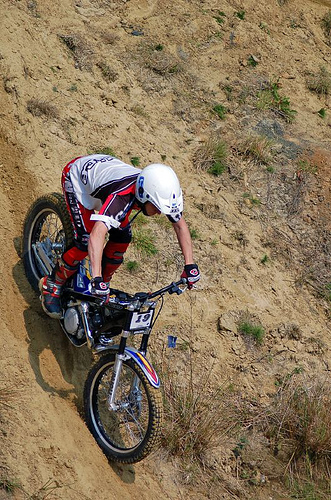

In [32]:
random_row=df.sample(1).iloc[0] #.sample(n) randomly selects n rows from df.
print(random_row.caption)
print()
im=Image.open(random_row.image)
im

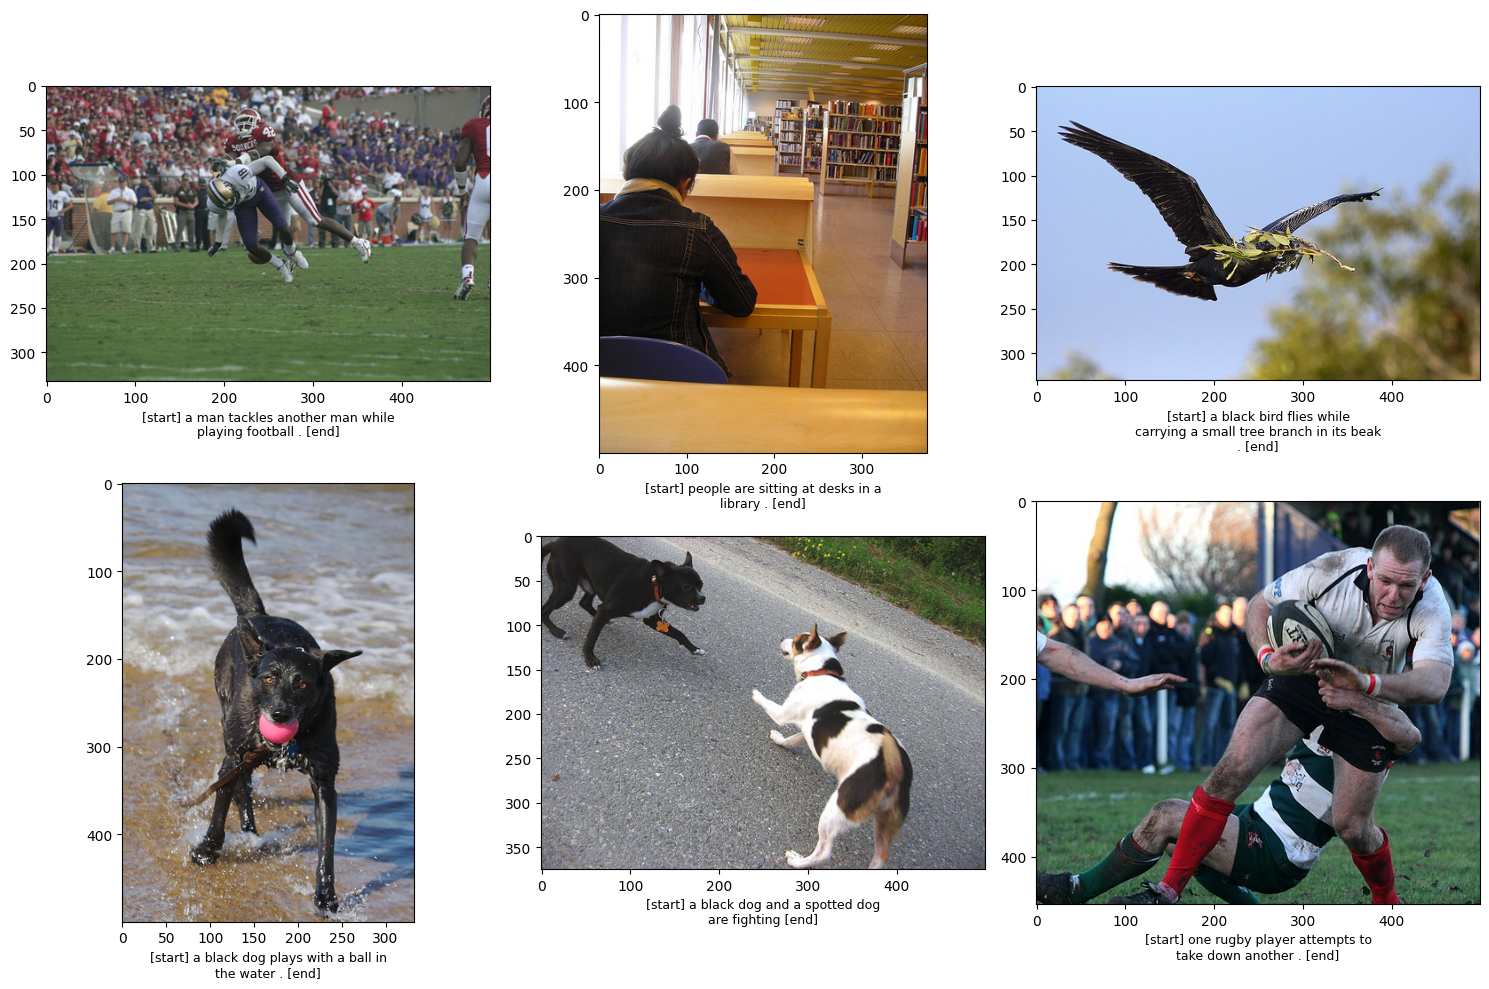

In [40]:
import textwrap

# Pick 6 random rows
sampled_rows = df.sample(6)

# Plot
plt.figure(figsize=(15, 10))

for i, (_, row) in enumerate(sampled_rows.iterrows()):
  plt.subplot(2, 3, i + 1)  # 2 rows × 3 columns grid
  img = Image.open(row['image'])
  plt.imshow(img)
  plt.imshow(img)
  #plt.axis("off")
  plt.xlabel("\n".join(textwrap.wrap(row['caption'], 40)), fontsize=9)

plt.tight_layout()
plt.show()


**Data Preprocessing**:
   - Explain how images are resized and normalized for model input.
   - Describe text preprocessing: tokenizing captions, building a vocabulary, and converting to sequences.
   - Demonstrate data splitting: training, validation, and test sets.

The code `df = df.groupby('image').head(2).reset_index(drop=True)` groups the DataFrame `df` by the 'image' column, takes the first two rows for each image group, and then resets the index. This effectively keeps only the first two captions for each image in the dataset.